In [15]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from fastkml import kml
from bs4 import BeautifulSoup
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


from fastkml import  kml
doc = file("/Users/ericlaibuffalo/CUSP/Data/Singapore/master-plan-2014-subzone-boundary/MP14_SUBZONE_WEB_PL.kml").read()
k = kml.KML()
k.from_string(doc)
len(k._features)

In [16]:
Lot = gpd.read_file('/Users/ericlaibuffalo/CUSP/Data/Singapore/Land_Lot.geojson')

ValueError: could not convert string to float: <html xmlns:fo="http://www.w3.org/1999/XSL/Format" xmlns:msxsl="urn:schemas-microsoft-com:xslt">  <head>  <META http-equiv="Content-Type" content="text/html">  <meta http-equiv="content-type" content=

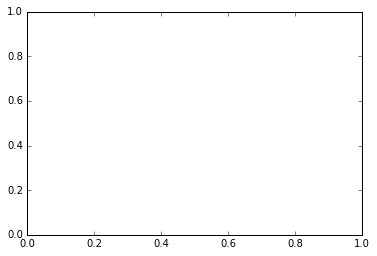

In [ ]:

# Next we perform some simple sanity checks

# Check that the number of features is correct
# This corresponds to the single ``Document``
features = list(k.features())
len(features)


# Check that we can access the features as a generator
# (The two Placemarks of the Document)
features[0].features()
<generator object features at 0x2d7d870>
f2 = list(features[0].features())
len(f2)


# Check specifics of the first Placemark in the Document
f2[0]
<fastkml.kml.Placemark object at 0x2d791d0>
f2[0].description
f2[0].name
'Document Feature 1'

# Check specifics of the second Placemark in the Document
f2[1].name
'Document Feature 2'
f2[1].name = "ANOTHER NAME"

# Verify that we can print back out the KML object as a string
print k.to_string(prettyprint=True)
<kml:kml xmlns:ns0="http://www.opengis.net/kml/2.2">
  <kml:Document>
    <kml:name>Document.kml</kml:name>
    <kml:visibility>1</kml:visibility>
    <kml:open>1</kml:open>
    <kml:Style id="exampleStyleDocument">
      <kml:LabelStyle>
        <kml:color>ff0000cc</kml:color>
        <kml:scale>1.0</kml:scale>
      </kml:LabelStyle>
    </kml:Style>
    <kml:Placemark>
      <kml:name>Document Feature 1</kml:name>
      <kml:visibility>1</kml:visibility>
      <kml:open>0</kml:open>
      <kml:Point>
        <kml:coordinates>-122.371000,37.816000,0.000000</kml:coordinates>
      </kml:Point>
    </kml:Placemark>
    <kml:Placemark>
      <kml:name>ANOTHER NAME</kml:name>
      <kml:visibility>1</kml:visibility>
      <kml:open>0</kml:open>
      <kml:Point>
        <kml:coordinates>-122.370000,37.817000,0.000000</kml:coordinates>
      </kml:Point>
    </kml:Placemark>
  </kml:Document>
</kml:kml>

In [6]:
Habitat = pd.read_csv('/Users/ericlaibuffalo/CUSP/Data/Singapore/mosquito_habitat_center.csv')
Habitat[:1]

,cartodb_id,the_geom,name,descriptio,timestamp,begin,_end,altitudemo,tessellate,extrude,visibility,draworder,icon,snippet
0,1,0101000020E61000004C2199B2CBF85940530C6903A200...,Aedes Mosquito Breeding Habitats : 1,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaN,NaN,NaN,NaN,-1,0,-1,NaN,NaN,NaN


In [2]:
Area = gpd.read_file('/Users/ericlaibuffalo/CUSP/Data/Singapore/PlanningArea/planning-area-census-2010.shp')

In [3]:
#Area['descriptio'].values

In [4]:
Area['Planning_Area']= Area.descriptio.apply(lambda x: str(BeautifulSoup(x).find_all('b')[0].text).replace('Planning Area Name -','').strip())

/Users/ericlaibuffalo/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
Area.Planning_Area.values

array(['PASIR RIS', 'MANDAI', 'OUTRAM', 'MARINA SOUTH', 'STRAITS VIEW',
       'CHANGI', 'SEMBAWANG', 'JURONG EAST', 'PIONEER', 'BOON LAY',
       'BUKIT MERAH', 'WESTERN WATER CATCHMENT', 'WESTERN WATER CATCHMENT',
       'WESTERN WATER CATCHMENT', 'ANG MO KIO', 'JURONG WEST', 'TENGAH',
       'ORCHARD', 'CHOA CHU KANG', 'SIMPANG', 'SIMPANG', 'CLEMENTI',
       'PAYA LEBAR', 'WOODLANDS', 'SENGKANG', 'YISHUN', 'SINGAPORE RIVER',
       'QUEENSTOWN', 'NORTH-EASTERN ISLANDS', 'NORTH-EASTERN ISLANDS',
       'NORTH-EASTERN ISLANDS', 'NORTH-EASTERN ISLANDS', 'BUKIT PANJANG',
       'TANGLIN', 'GEYLANG', 'PUNGGOL', 'BUKIT TIMAH', 'TUAS', 'TUAS',
       'TUAS', 'LIM CHU KANG', 'WESTERN ISLANDS', 'WESTERN ISLANDS',
       'WESTERN ISLANDS', 'WESTERN ISLANDS', 'WESTERN ISLANDS',
       'WESTERN ISLANDS', 'WESTERN ISLANDS', 'WESTERN ISLANDS',
       'WESTERN ISLANDS', 'WESTERN ISLANDS', 'WESTERN ISLANDS',
       'WESTERN ISLANDS', 'WESTERN ISLANDS', 'WESTERN ISLANDS',
       'WESTERN ISLANDS', 

In [40]:
Area = Area[['Planning_Area','geometry',]]

In [41]:
len(Area)
len(Area.Planning_Area.unique())

96

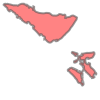

In [72]:
import shapely
from shapely.geometry import Polygon

from shapely.ops import cascaded_union

 
#polygons = [i for i in Area[Area.Planning_Area=='SOUTHERN ISLANDS'].geometry.values]
polygons = [Area[Area.Planning_Area=='SOUTHERN ISLANDS'].geometry.iloc[0],
                  Area[Area.Planning_Area=='SOUTHERN ISLANDS'].geometry.iloc[1]] 
u = cascaded_union(polygons)
u

In [63]:
(Area[Area.Planning_Area=='SOUTHERN ISLANDS'].geometry)

67    POLYGON Z ((103.82332076201 1.25728796910656 2...
68    POLYGON Z ((103.848705533583 1.2308831914022 2...
69    POLYGON Z ((103.8553608272 1.24116253624205 23...
70    POLYGON Z ((103.840587633372 1.22886164588252 ...
71    POLYGON Z ((103.860469542657 1.22431729983595 ...
72    POLYGON Z ((103.834859956254 1.21549956423224 ...
73    POLYGON Z ((103.831957020674 1.21695093510276 ...
74    POLYGON Z ((103.815914851021 1.24913804497669 ...
75    POLYGON Z ((103.814234963241 1.260189136569 23...
76    POLYGON Z ((103.822500279105 1.24721595828036 ...
77    POLYGON Z ((103.829123142544 1.24043759649659 ...
78    POLYGON Z ((103.811837328917 1.25450477381185 ...
79    POLYGON Z ((103.812913733784 1.2537847261156 2...
80    POLYGON Z ((103.836042068265 1.21274400714727 ...
81    POLYGON Z ((103.859559864456 1.22546181570442 ...
82    POLYGON Z ((103.860870649126 1.22171450182593 ...
Name: geometry, dtype: object

In [68]:
import shapely
p1 = shapely.Polygon(Area.geometry.iloc[0]) 

AttributeError: 'module' object has no attribute 'Polygon'

In [ ]:
Area2 = gpd.GeoDataFrame(pd.concat(Area[Area.Planning_Area=='SOUTHERN ISLANDS'][:6]))

In [8]:
#Area['Description']= Area.descriptio.apply(lambda x: str(x.encode('utf-8','ignore')).split(''))

In [10]:
#Area['DescriptionD'] = Area.Description.apply(lambda x: [i for i in x if i.isupper()])

In [31]:
Area.Description.head()

0       PASIR RIS
1          MANDAI
2          OUTRAM
3    MARINA SOUTH
4    STRAITS VIEW
Name: Description, dtype: object

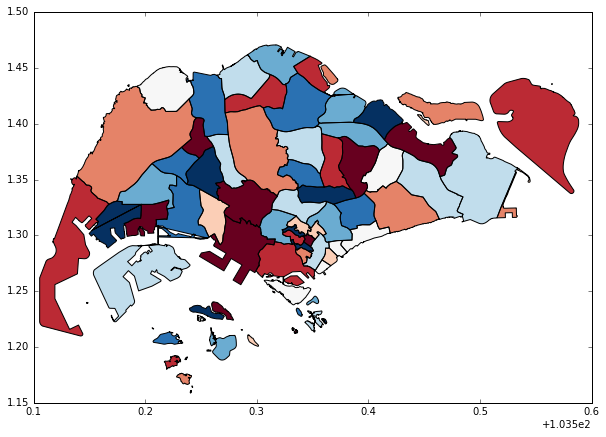

In [34]:
Area.plot(colormap='RdBu', alpha=1, categorical=False, legend=False, axes=None,figsize=(10,10))

In [73]:
Area.head()

,Planning_Area,geometry
0,PASIR RIS,POLYGON Z ((103.953216030968 1.38201578207298 ...
1,MANDAI,POLYGON Z ((103.825884132432 1.4353634195484 2...
2,OUTRAM,POLYGON Z ((103.847182987759 1.28543532750035 ...
3,MARINA SOUTH,POLYGON Z ((103.872516395857 1.28128478119702 ...
4,STRAITS VIEW,POLYGON Z ((103.862693238956 1.26975853824214 ...


In [5]:
POP = pd.read_csv('/Users/ericlaibuffalo/CUSP/Data/Singapore/POP2015.csv', error_bad_lines = False)

CParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [2]:
Dis_Week = pd.read_csv('/Users/ericlaibuffalo/CUSP/Data/Singapore/weekly-infectious-bulletin-cases/weekly-infectious-bulletin-cases.csv')

In [3]:
Dis_Week.head()

,epi_week,disease,number_of_cases
0,2012-W01,Acute Viral hepatitis B,0
1,2012-W01,Acute Viral hepatitis C,0
2,2012-W01,Avian Influenza,0
3,2012-W01,Campylobacterenterosis,6
4,2012-W01,Chikungunya Fever,0


In [4]:
Dis_Week_deng = Dis_Week[Dis_Week['disease']=='Dengue Fever']

In [5]:
Dis_Week_deng.head()

,epi_week,disease,number_of_cases
6,2012-W01,Dengue Fever,74
37,2012-W02,Dengue Fever,64
68,2012-W03,Dengue Fever,60
99,2012-W04,Dengue Fever,50
130,2012-W05,Dengue Fever,84


In [6]:
deng_weekly = Dis_Week_deng.groupby(['epi_week']).aggregate(np.mean)
deng_weekly[deng_weekly['number_of_cases']>600]

,number_of_cases
epi_week,
2013-W20,611
2013-W21,637
2013-W22,742
2013-W23,813
2013-W24,805
2013-W25,838
2013-W26,802
2013-W27,676
2014-W26,671


In [7]:
deng_weekly.head()

,number_of_cases
epi_week,
2012-W01,74
2012-W02,64
2012-W03,60
2012-W04,50
2012-W05,84


In [8]:
figsize(15,3)
ax  = deng_weekly.diff.plot()
#ax.set_xticks(range(len(deng_weekly)));
#ax.set_xticklabels(deng_weekly.index.tolist(), rotation=90);

AttributeError: 'function' object has no attribute 'plot'

In [ ]:
figsize(15,3)
ax  = deng_weekly.plot()
#ax.set_xticks(range(len(deng_weekly)));
# ax.set_xticklabels(deng_weekly.index.tolist(), rotation=90);

In [100]:
Weather = pd.read_csv('/Users/ericlaibuffalo/CUSP/Data/Singapore/dengue_weather.csv')
Weather.head()

,Unnamed: 0,epi_week,Cases,Year,Date_T,Mean_Rainfall,Mean_Temperature,Mean_Wind_Speed
0,0,2012-W01,74,2012,1,13.350000,26.762500,11.487500
1,1,2012-W02,66,2012,1,13.350000,26.762500,11.487500
2,2,2012-W03,61,2012,2,3.685714,26.228571,7.814286
3,3,2012-W04,52,2012,2,3.685714,26.228571,7.814286
4,4,2012-W05,85,2012,3,4.000000,26.914286,7.357143


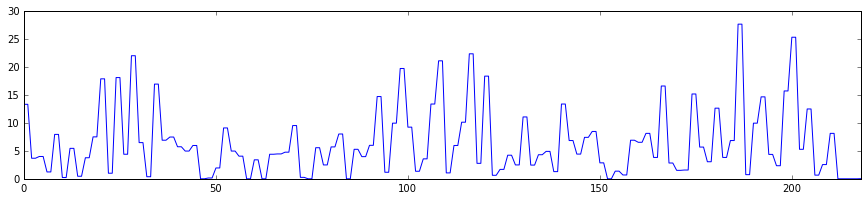

In [98]:
figsize(15,3)
ax  = Weather.Mean_Rainfall.plot()
#ax.set_xticks(range(len(deng_weekly)));

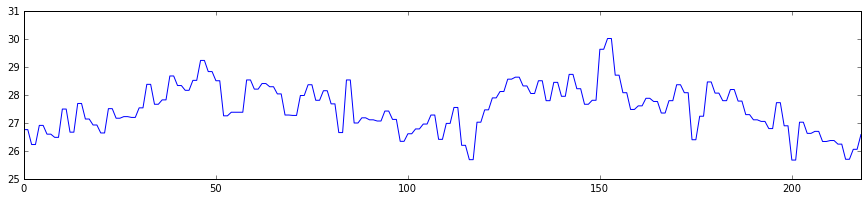

In [101]:
figsize(15,3)
ax  = Weather.Mean_Temperature.plot()

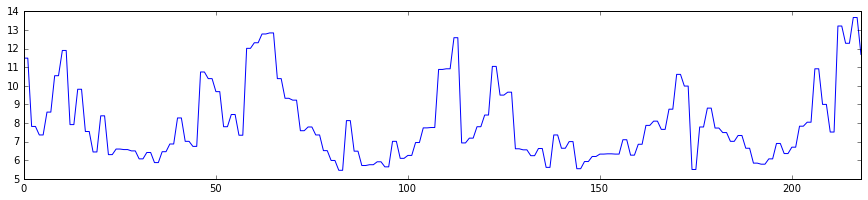

In [102]:
figsize(15,3)
ax  = Weather.Mean_Wind_Speed.plot()